### About

This is a project I made for school. There are markdown cells explaining the goals and reasoning for certain decisions I made along the way. Skills used in this project includes **data cleaning** and **data visualization**.

In [ ]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

### Research Question

How does the relationship between `Review Score` and `Sales` change based on different values of `Genre` in the dataset?

### Research Motivation

Exploring the relationship between review scores and sales among different genres of video games can reveal interesting conclusions. Through data science, we could find out how much the quality of a videogame matters to generate sales in certain genres. For example, do consumers of sports videogames care as much about the quality of gameplay as much as consumers of strategy videogames? This knowledge may be useful to developers when considering the costs of making a videogame. If the game they are making is of a genre that will sell similarly regardless of quality, perhaps they may not put as much effort or money into the development.

## 2. Dataset Discussion

### Dataset Display


In [ ]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [ ]:
df.shape

(1212, 36)

The original dataframe has 1212 rows.

### Dataset Source

The dataset used for this project is the pre-selected option chose by Dr. Ellison and it was originally collected by Dr. Joe Cox. I downloaded the dataset in the zip file for this project on 2/14/2024. A link to the dataset and more information is here: https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s.

### Original Dataset Information

 The data was originally collected by Dr. Joe Cox and, according to him, "this study uses a unique data set of individual video game titles to estimate the effect of an exhaustive set of observable characteristics on the likelihood of a video game becoming a block-buster title". There are over 1,000 observations each representing a video game title and the dataset includes many describing variables about the features, metrics, length, and metadata for each. The data is a "snapshot of the US videogame market during September 2010" and draws from sources such as Metacritic for reviews, Mobygames for gameplay characteristics, and VGcharts for unit sales.
 
  The data is not included of all videogame titles as there are less popular titles that were left out. This is important when considering our research question because there could be games not included that would skew the outcome. For example, a less popular game that was given a rating by critics that does not follow our data could make us reconsider our findings or reconstruct the analysis. The three variables we will explore in this analysis are the `Review Score`, `Sales`, and `Genre` of each title. The `Review Score` based on a scale out of 100 and the `Sale` is in millions.

## 3. Dataset Cleaning

### Missing Value Detection and Cleaning

In [ ]:
df = df[['Metrics.Review Score','Metrics.Sales','Metadata.Genres']]
df.head()

,Metrics.Review Score,Metrics.Sales,Metadata.Genres
0,85,4.69,Action
1,89,0.56,Strategy
2,81,0.54,"Action,Racing / Driving,Sports"
3,81,0.49,Sports
4,61,0.45,Action


Making the dataframe only include the variables we intend to explore.

In [ ]:
df.isna().sum()

Metrics.Review Score    0
Metrics.Sales           0
Metadata.Genres         0
dtype: int64

Checking for any explicit missing values. As we can see, there are none.

In [ ]:
df.dtypes

Metrics.Review Score      int64
Metrics.Sales           float64
Metadata.Genres          object
dtype: object

The Review Score and Sales both being numerical data types tells us there are no implicit missing values in those columns.

In [ ]:
np.unique(df['Metadata.Genres'].values)

array(['Action', 'Action,Adventure', 'Action,Adventure,Racing / Driving',
       'Action,Adventure,Racing / Driving,Sports',
       'Action,Adventure,Role-Playing (RPG)', 'Action,Adventure,Strategy',
       'Action,Educational', 'Action,Racing / Driving',
       'Action,Racing / Driving,Role-Playing (RPG)',
       'Action,Racing / Driving,Role-Playing (RPG),Strategy',
       'Action,Racing / Driving,Simulation',
       'Action,Racing / Driving,Sports',
       'Action,Racing / Driving,Sports,Strategy',
       'Action,Role-Playing (RPG)',
       'Action,Role-Playing (RPG),Simulation',
       'Action,Role-Playing (RPG),Simulation,Sports,Strategy',
       'Action,Role-Playing (RPG),Strategy', 'Action,Simulation',
       'Action,Simulation,Sports', 'Action,Simulation,Strategy',
       'Action,Sports', 'Action,Strategy', 'Adventure',
       'Adventure,Educational,Strategy', 'Adventure,Role-Playing (RPG)',
       'Adventure,Role-Playing (RPG),Strategy', 'Adventure,Simulation',
       'Adventu

By looking at the values for the genres, we can tell there are no implicit missing values. Now we know that there are no missing values in our dataframe meaning we do not have to drop any rows. The con of this technique is that it may take a while to look through all of the categorical values. However, the pro is that we have reduced the issues we would encounter in future analysis.

### Sample Size Cleaning

We will only be including the genres with at least 10 observations to ensure we have a good sample size for each value.

In [ ]:
genre_counts = df['Metadata.Genres'].value_counts()
genre_counts

Action                                                  476
Sports                                                  166
Strategy                                                 62
Action,Role-Playing (RPG)                                55
Racing / Driving                                         53
Role-Playing (RPG)                                       52
Action,Strategy                                          45
Action,Racing / Driving                                  40
Simulation                                               30
Action,Simulation                                        28
Action,Adventure                                         28
Adventure                                                21
Role-Playing (RPG),Strategy                              20
Action,Sports                                            20
Racing / Driving,Sports                                  19
Simulation,Strategy                                      12
Racing / Driving,Simulation,Sports      

In [ ]:
top_genre_counts = genre_counts[genre_counts > 10]
top_genre_counts

Action                         476
Sports                         166
Strategy                        62
Action,Role-Playing (RPG)       55
Racing / Driving                53
Role-Playing (RPG)              52
Action,Strategy                 45
Action,Racing / Driving         40
Simulation                      30
Action,Simulation               28
Action,Adventure                28
Adventure                       21
Role-Playing (RPG),Strategy     20
Action,Sports                   20
Racing / Driving,Sports         19
Simulation,Strategy             12
Name: Metadata.Genres, dtype: int64

In [ ]:
top_genre = top_genre_counts.index
top_genre

Index(['Action', 'Sports', 'Strategy', 'Action,Role-Playing (RPG)',
       'Racing / Driving', 'Role-Playing (RPG)', 'Action,Strategy',
       'Action,Racing / Driving', 'Simulation', 'Action,Simulation',
       'Action,Adventure', 'Adventure', 'Role-Playing (RPG),Strategy',
       'Action,Sports', 'Racing / Driving,Sports', 'Simulation,Strategy'],
      dtype='object')

In [ ]:
df = df[df['Metadata.Genres'].isin(top_genre)]
df.shape

(1127, 3)

We dropped 85 rows.

### Outlier Cleaning - Single Variable Outlier Inspection

The pros of dropping outliers is that our lines of fit will be more representative of the rest of the data which makes for a more efficient model. The cons of dropping outliers is that our model and statistics will not be representative of the full dataset.

<Axes: xlabel='Metrics.Sales'>

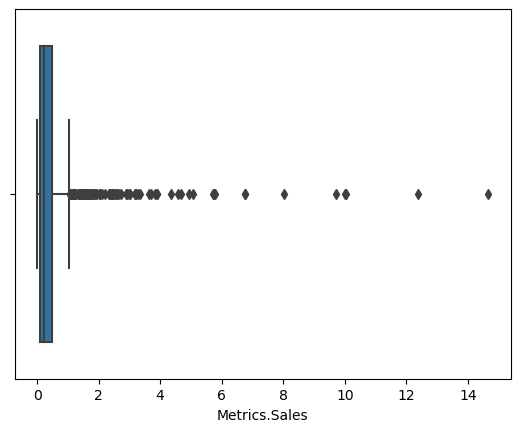

In [ ]:
sns.boxplot(x = 'Metrics.Sales', data = df)

Based on the boxplot, the sales above 9 million seem to be outliers from the other data.

In [ ]:
df = df[df['Metrics.Sales'] < 9]
df.shape

(1122, 3)

We dropped 5 rows.

<Axes: xlabel='Metrics.Review Score'>

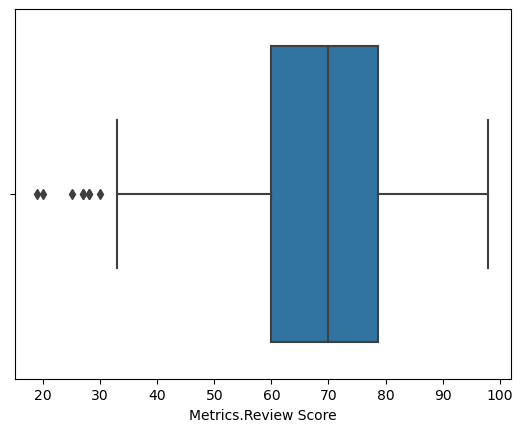

In [ ]:
sns.boxplot(x = 'Metrics.Review Score', data = df)

Based on the boxplot, the reviews under 22 seem to be outliers from the other data.

In [ ]:
df = df[df['Metrics.Review Score'] > 22]
df.shape

(1120, 3)

We dropped 2 rows.

### Outlier Cleaning - Two Variable Outlier Inspection

Once again it is important to note that the pros of dropping outliers is that our lines of fit will be more representative of the rest of the data which makes for a more efficient model. The cons of dropping outliers is that our models and statistics will not be representative of the full dataset.

<Axes: xlabel='Metrics.Review Score', ylabel='Metrics.Sales'>

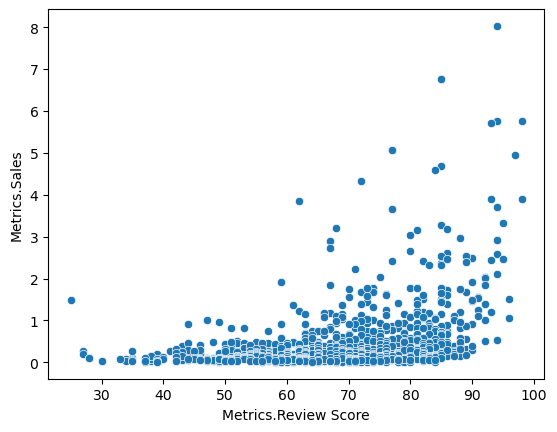

In [ ]:
sns.scatterplot(x = 'Metrics.Review Score', y = 'Metrics.Sales', data = df)

There does not seem to be any big outliers in the scatterplot so we will not drop any rows.

### Other Data Cleaining

To make the answer to the research question more clear, let's simplify our genres. Some of the variables included multiple genres split by a comma which could be confusing because the primary genre is not specified. The values that include 'Racing' such as `Racing / Driving` and `Racing / Driving, Sports` seem to mostly fall under the racing genre, so let's include them with the `Racing`. Other than that, removing rows with multiple genres will help make our outcomes more distinct.

In [ ]:
Racing_Genres = ['Racing / Driving', 'Racing / Driving,Sports']
df['Metadata.Genres'] = df['Metadata.Genres'].apply(lambda x: 'Racing' if x in Racing_Genres else x)
df['Metadata.Genres'] = df['Metadata.Genres'].apply(lambda x: np.nan if ',' in x else x)
df = df.dropna()
df.shape

(873, 3)

We dropped 247 rows.

## 4. <u>Research Question</u>



### Research Question Statement

How does the Relationship between `Review Score` and `Sales` Change based on Different Values of `Genre` in the Dataset?

### Visualization

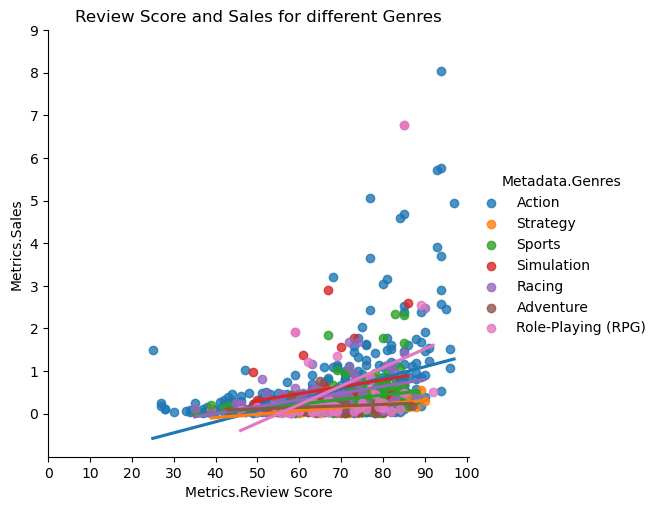

In [ ]:
sns.lmplot(x='Metrics.Review Score', y='Metrics.Sales', hue='Metadata.Genres', ci=False, data=df)
plt.xticks(np.arange(0,101,step = 10))
plt.yticks(np.arange(0,10, step = 1))
plt.title('Review Score and Sales for different Genres')
plt.show()

### Summary Statistics

In [ ]:
df.groupby(['Metadata.Genres']).corr()

Metrics.Review Score  Metrics.Sales
Metadata.Genres                                                             
Action             Metrics.Review Score              1.000000       0.429508
                   Metrics.Sales                     0.429508       1.000000
Adventure          Metrics.Review Score              1.000000       0.228729
                   Metrics.Sales                     0.228729       1.000000
Racing             Metrics.Review Score              1.000000       0.410809
                   Metrics.Sales                     0.410809       1.000000
Role-Playing (RPG) Metrics.Review Score              1.000000       0.352899
                   Metrics.Sales                     0.352899       1.000000
Simulation         Metrics.Review Score              1.000000       0.218260
                   Metrics.Sales                     0.218260       1.000000
Sports             Metrics.Review Score              1.000000       0.293519
                   Metrics.Sales                     0.293519       1.000000
Strategy           Metrics.Review Score              1.000000       0.537271
                   Metrics.Sales                     0.537271       1.000000

### Research Question Answer

From our plot we can tell that the **direction** of the relationship between `Review Score` and `Sales` are positive among the genres. The **shape**, however has changes between different genres with some having a more linear relationship and some curving up toward high `Review Score` values. There are also changes in **strength** shown in the correlation chart where `Review Score` and `Sales` have a correlation of .537 in the `Strategy` genre and a correlation of .218 in the `Simulation` genre. **Outliers** differ among the genres shown in the plot where `RPG` and `Action` games have more points far from the majority compared to other genres. Finally, there are large **slope** changes with `RPG` having a much steeper slope than others while `Strategy` and `Adventure` are quite flat. Based on the many differences we observed, we can conclude that the relationship between `Review Score` and `Sales` does change for different values of `Genre`, more specifically, the type of genre changes the **shape**, **strength**, **outliers**, and **slope**.


## 5. Conclusion

### Summarization

After evaluating our dataset, cleaning the data, and conducting data analysis, we found a change in relationship between `Review Score` and `Sales` of U.S. videogame titles for different values of `Genre`. Knowing this could help developers of a certain genre decide how they should focus on getting a specific score from critics when trying to generate sales. With our visualizations and summary statistics we evaluated exactly how the relationship differs among the different genre values. For example, a developer of an RPG game may want to direct their creation process towards the likings of a critic because it yields more sales based on the slope we found. Knowing how the direction, shape, strength, outliers, and slope changes helps us gain a greater understanding of the gaming industry.

### Shortcomings / Caveats

A shortcoming of our research would be the possibility of multicollinearity between our explanatory variables which could have made our linear model plots less reliable. Another caveat for this project is our removal of data. Getting rid of rows with outliers or of certain genres means that our models and statistics did not represent the full original dataset. These caveats may make a company hesitant to incorporate our findings into their development process.

### Future Work

Based on the observations made in the analysis, I am interested in continuing to explore this relationship even more. I would like to analyze a more recent dataset to see if our conclusions still hold true in more present times. I also would like to use machine learning to make predictions of sales of other titles. Finally, I want to limit the caveats in future research as much as possible by reducing multicollinearity and trying to find a dataset with more distinct genres.